In [2]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

import warnings 
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [3]:
data = pd.read_csv('/content/Mall_Customers.csv') 
# https://www.kaggle.com/ksarvakar/mall-customers  Download it
X = data.iloc[:, [1,4]].values
data.head(5)


labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
print(X)


[[1 39]
 [1 81]
 [0 6]
 [0 77]
 [0 40]
 [0 76]
 [0 6]
 [0 94]
 [1 3]
 [0 72]
 [1 14]
 [0 99]
 [0 15]
 [0 77]
 [1 13]
 [1 79]
 [0 35]
 [1 66]
 [1 29]
 [0 98]
 [1 35]
 [1 73]
 [0 5]
 [1 73]
 [0 14]
 [1 82]
 [0 32]
 [1 61]
 [0 31]
 [0 87]
 [1 4]
 [0 73]
 [1 4]
 [1 92]
 [0 14]
 [0 81]
 [0 17]
 [0 73]
 [0 26]
 [0 75]
 [0 35]
 [1 92]
 [1 36]
 [0 61]
 [0 28]
 [0 65]
 [0 55]
 [0 47]
 [0 42]
 [0 42]
 [0 52]
 [1 60]
 [0 54]
 [1 60]
 [0 45]
 [1 41]
 [0 50]
 [1 46]
 [0 51]
 [1 46]
 [1 56]
 [1 55]
 [0 52]
 [0 59]
 [1 51]
 [1 59]
 [0 50]
 [0 48]
 [1 59]
 [0 47]
 [1 55]
 [0 42]
 [0 49]
 [0 56]
 [1 47]
 [1 54]
 [0 53]
 [1 48]
 [0 52]
 [0 42]
 [1 51]
 [1 55]
 [1 41]
 [0 44]
 [0 57]
 [1 46]
 [0 58]
 [0 55]
 [0 60]
 [0 46]
 [0 55]
 [1 41]
 [1 49]
 [0 40]
 [0 42]
 [1 52]
 [0 47]
 [0 50]
 [1 42]
 [1 49]
 [0 41]
 [0 48]
 [1 59]
 [1 55]
 [1 56]
 [0 42]
 [0 50]
 [1 46]
 [1 43]
 [1 48]
 [1 52]
 [0 54]
 [0 42]
 [1 46]
 [0 48]
 [0 50]
 [0 43]
 [0 59]
 [0 43]
 [0 57]
 [1 56]
 [0 40]
 [0 58]
 [1 91]
 [0 29]
 [0 77

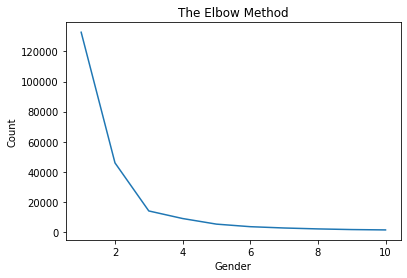

In [4]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

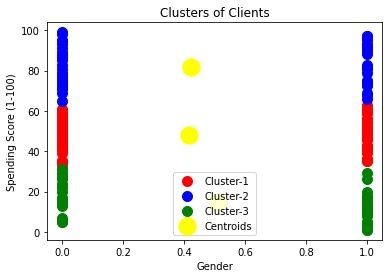

In [6]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(X)


plt.scatter(X[ymeans == 0, 0], X[ymeans == 0, 1], s = 100, c = 'red', label = 'Cluster-1' )
plt.scatter(X[ymeans == 1, 0], X[ymeans == 1, 1], s = 100, c = 'blue', label = 'Cluster-2')
plt.scatter(X[ymeans == 2, 0], X[ymeans == 2, 1], s = 100, c = 'green', label = 'Cluster-3')
# plt.scatter(X[ymeans == 3, 0], X[ymeans == 3, 1], s = 100, c = 'red', label = 'Cluster-4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow',label='Centroids')

#plt.style.use('fivethirtyeight')
plt.title('Clusters of Clients')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

